# Outlier Detection using two stage strategy

In this notebook we show the outlier detection functionality in ALPS

## Importing libraries

In [1]:
import pickle
from Functions import *
from matplotlib.pyplot import *

## Importing data

In [2]:
Data = pickle.load( open( "ts4.p", "rb" ) )

## Computing the Outliers and Clean data

In [3]:
dat,out = Outlier(Data,thresh1=3,thresh2 = 1.2)

## Fitting and Plotting

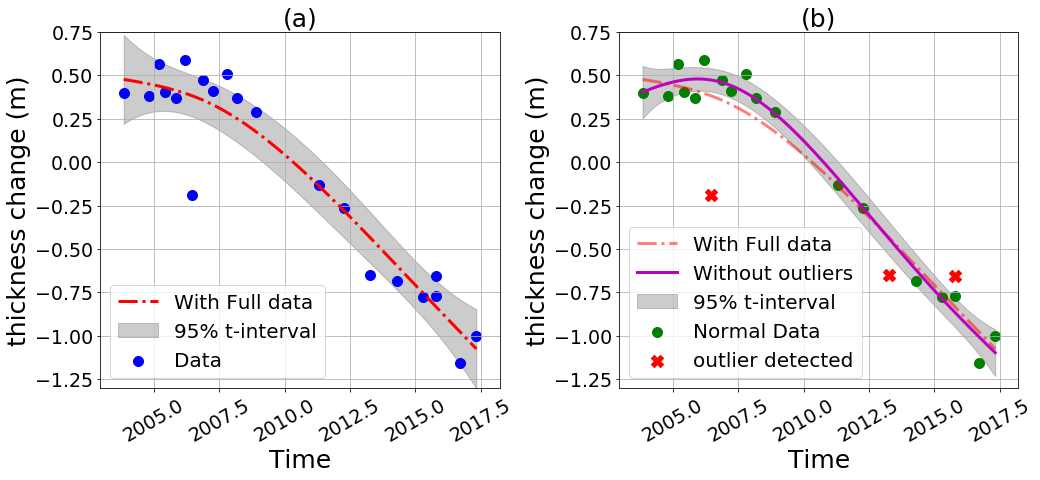

In [4]:

f1 = figure(figsize=(15,5))
ax = subplot2grid((1,2),(0,0))

p =4
q = 2
[n,lamb,sigmasq] = full_search_nk(Data,p,q)
c = n+p
U = Kno_pspline_opt(Data,p,n)
B = Basis_Pspline(n,p,U,Data[:,0])
P = Penalty_p(q,c)
theta = np.linalg.solve(B.T.dot(B) + lamb*P, B.T.dot(Data[:,1].reshape(-1,1)))
### Getting mean of the prediction
num = 300
xpred = linspace(Data[0,0],Data[-1,0],num)
Bpred = Basis_Pspline(n,p,U,xpred)
ypred1 = Bpred.dot(theta)
std_t1,std_n1 = Var_bounds(Data,Bpred,B,theta,P,lamb)


ax.plot(xpred,ypred1,linewidth=3,color = 'r',label = 'With Full data',linestyle = '-.')
#ax.set_title('Time Series 4',size = 25)
ax.set_title('(a)',size = 25)
ax.tick_params(axis='x', labelsize=19)
ax.tick_params(axis='y', labelsize=19)
ax.set_xlabel('Time',size=25)
ax.set_ylabel('thickness change (m)',size = 25)
ax.fill_between(xpred.flatten(),ypred1.flatten()-std_t1,ypred1.flatten()+std_t1, alpha = 0.2,color = 'k',label = '95% t-interval')
ax.scatter(Data[:,0],Data[:,1],label = 'Data',color = 'b',s=100)
ax.legend(fontsize=20,loc=3)
ax.set_ylim([-1.3,0.75])
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(30)
ax.grid(True)

###################################

ax = subplot2grid((1,2),(0,1))

Data = dat
[n,lamb,sigmasq] = full_search_nk(Data,p,q)
c = n+p
U = Kno_pspline_opt(Data,p,n)
B = Basis_Pspline(n,p,U,Data[:,0])
P = Penalty_p(q,c)
theta = np.linalg.solve(B.T.dot(B) + lamb*P, B.T.dot(Data[:,1].reshape(-1,1)))
### Getting mean of the prediction
num = 300
xpred = linspace(Data[0,0],Data[-1,0],num)
Bpred = Basis_Pspline(n,p,U,xpred)
ypred2 = Bpred.dot(theta)
std_t2,std_n2 = Var_bounds(Data,Bpred,B,theta,P,lamb)

ax.plot(xpred,ypred1,linewidth=3,color = 'r',label = 'With Full data', linestyle = '-.',alpha = 0.5)
ax.plot(xpred,ypred2,linewidth=3,color = 'm', label = 'Without outliers')
ax.set_title('(b)',size = 25)
ax.tick_params(axis='x', labelsize=19)
ax.tick_params(axis='y', labelsize=19)
ax.set_xlabel('Time',size=25)
ax.set_ylabel('thickness change (m)',size = 25)
ax.fill_between(xpred.flatten(),ypred2.flatten()-std_t2,ypred2.flatten()+std_t2, alpha = 0.2,color = 'k',label = '95% t-interval')
ax.scatter(dat[:,0],dat[:,1],label = 'Normal Data',color = 'g',s = 100)
ax.scatter(out[:,0],out[:,1],label = 'outlier detected',color = 'r',s = 150, marker = 'X')
ax.legend(fontsize=20)
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(30)
ax.set_ylim([-1.3,0.75])
#subplots_adjust(left=0.19, bottom = 0, right = 0.94, top = 0.79,wspace = 0.3,hspace = 0.3)   # determines the padding on the graph
ax.grid(True)
subplots_adjust(left=0.09, bottom = 0, right = 0.94, top = 0.99,wspace = 0.3,hspace = 0.3)   # determines the padding on the graph
show()